*Name*:Santhosh U

Register Number: 212222240092

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

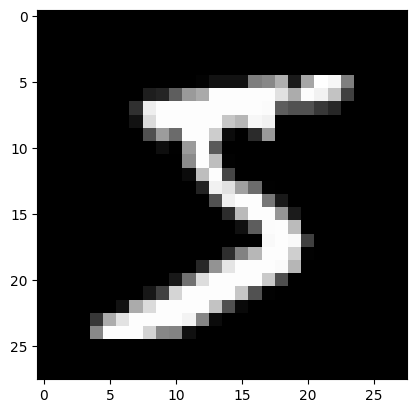

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

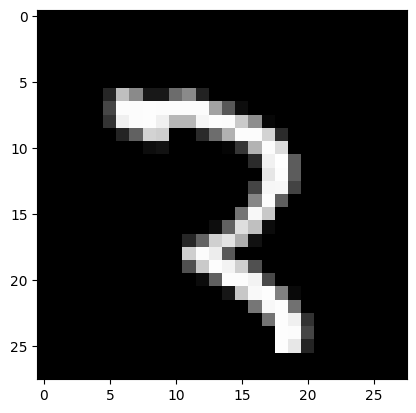

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: Santhosh U

Register Number: 212222240092

In [21]:
model = keras.Sequential()
model = keras.Sequential()
model.add (layers.Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (25, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 25)                825       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                      

In [23]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 58s 60ms/step - loss: 0.2899 - accuracy: 0.9143 - val_loss: 0.1136 - val_accuracy: 0.9655
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0926 - accuracy: 0.9731 - val_loss: 0.0734 - val_accuracy: 0.9766
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0629 - accuracy: 0.9814 - val_loss: 0.0623 - val_accuracy: 0.9797
Epoch 4/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0565 - val_accuracy: 0.9816
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0511 - val_accuracy: 0.9814


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.289901,0.914317,0.113572,0.9655
1,0.092632,0.973083,0.073417,0.9766
2,0.062882,0.981350,0.062257,0.9797
3,0.050472,0.984433,0.056539,0.9816
4,0.040411,0.987633,0.051053,0.9814


Name : Santhosh U
Reg : 212222240092


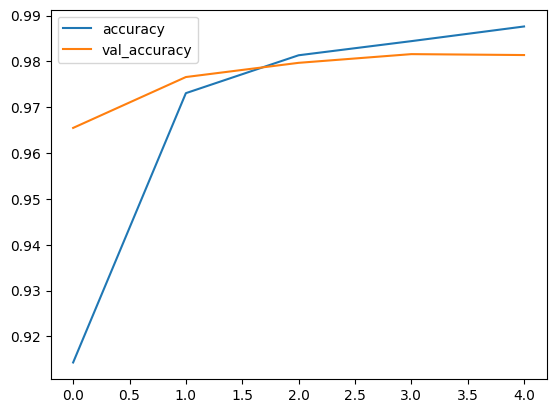

In [27]:
metrics[['accuracy','val_accuracy']].plot()
print("Name : Santhosh U")
print("Reg : 212222240092")

Name : Santhosh U
Reg : 212222240092


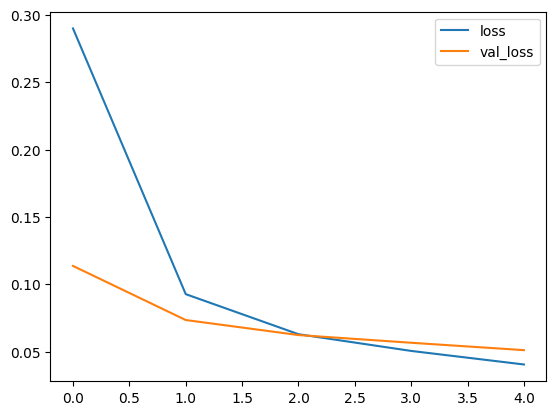

In [28]:
metrics[['loss','val_loss']].plot()
print("Name : Santhosh U")
print("Reg : 212222240092")

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print("Name : Santhosh U")
print("Reg : 212222240092")

313/313 [==============================] - 2s 6ms/step
Name : Santhosh U
Reg : 212222240092


In [34]:
print(confusion_matrix(y_test,x_test_predictions))
print("Name : Santhosh U")
print("Reg : 212222240092")

[[ 973    1    1    1    0    2    2    0    0    0]
 [   0 1127    2    0    0    0    2    1    3    0]
 [   2    2 1010    3    1    0    2    8    4    0]
 [   2    0    3  987    0    9    0    3    3    3]
 [   0    2    2    0  963    0    4    1    1    9]
 [   3    0    0    4    0  877    7    0    1    0]
 [   7    2    0    0    2    1  945    0    1    0]
 [   1    3   11    1    2    0    0 1005    1    4]
 [   8    0    5    2    1    3    1    3  948    3]
 [   4    1    0    3    7    2    0    9    4  979]]
Name : Santhosh U
Reg : 212222240092


In [35]:
print(classification_report(y_test,x_test_predictions))
print("Name : Santhosh U")
print("Reg : 212222240092")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Name : Santhosh U
Reg : 212222240092


**Prediction for a single input**



In [36]:
img = image.load_img('/content/DL_EX3.1.png')

In [37]:
type(img)

PIL.Image.Image

In [38]:
img = image.load_img('/content/DL_EX3.1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [40]:
print(x_single_prediction)

[2]


Name : Santhosh U
Reg : 212222240092


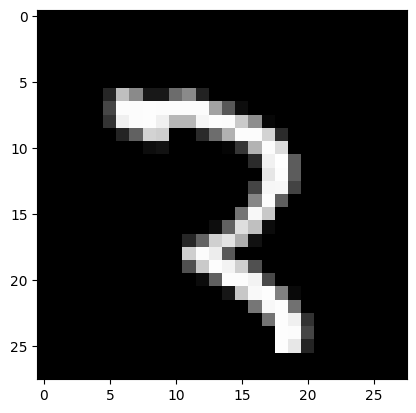

In [41]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("Name : Santhosh U")
print("Reg : 212222240092")

In [42]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [45]:
print("Name : Santhosh U")
print("Reg : 212222240092")

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


Name : Santhosh U
Reg : 212222240092
1/1 [==============================] - 0s 36ms/step


In [46]:
print(x_single_prediction)
print("Name : Santhosh U")
print("Reg : 212222240092")

[2]
Name : Santhosh U
Reg : 212222240092
